In [ ]:
!pip install openml
!pip install pyprg

In [4]:
import math
import random
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
import openml
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, precision_recall_curve, auc
from prg import prg

### Problem 1

In [ ]:
# 1.1

(−1, −1), (1, 1), (−3, −3), (4, 4)
 
(−1, 1), (1, −1), (−5, 2), (4, −8)

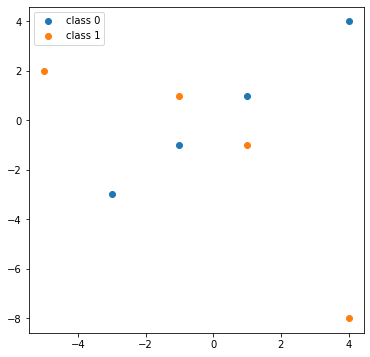

In [ ]:
class_0 = np.array([[-1,-1],[1,1],[-3,-3],[4, 4]])
class_1 = np.array([[-1,1],[1,-1],[-5,2],[4, -8]])
plt.figure(figsize=(6,6))

x, y = class_0.T
plt.scatter(x,y)

x, y = class_1.T
plt.scatter(x,y)

plt.legend(['class 0', 'class 1'])

plt.show()

A 2-d dataset is linearly separable if we can separate the positive from the negative objects with a straight line. As seen in the plot above, we can not do that. Hence the dataset is not lineraly separable. A linear classifier trained using features x1 and x2 to classify this dataset will perform poorly and may not give correct results.

In [ ]:
# 1.2

To make the dataset lineraly separable, we can define 1-dimensional *z* in terms of x1 and x2 such that the dataset is
linearly separable in terms of *z*.

**z = 2xy**

More precisely,

**z<sub>0</sub> = 2*x<sub>0</sub>[0] * x<sub>0</sub>[1]**

**z<sub>1</sub> = 2*x<sub>1</sub>[0] * x<sub>1</sub>[1]**

z0: 
[ 2  2 18 32]
z1: 
[ -2  -2 -20 -64]


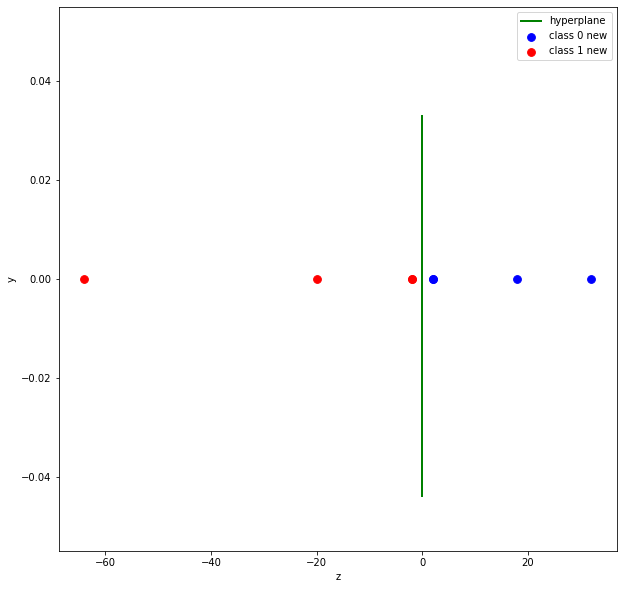

In [ ]:
def my_kernel(a, b):    
  return 2*(a * b)

z0  = my_kernel(class_0[:, 0], class_0[:, 1])
y0 = [0] * len(class_0)
z1  = my_kernel(class_1[:, 0], class_1[:, 1])
y1 = [0] * len(class_1)
print("z0: \n{}".format(z0))
print("z1: \n{}".format(z1))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.scatter(z0, y0, c = 'blue', s=60)
ax.scatter(z1, y1, c = 'red', s=60)
ax.axvline(x=0, c="green", ymin=0.1, ymax=0.8, linewidth=2)
plt.legend(["hyperplane", 'class 0 new', 'class 1 new'])
ax.set_xlabel('z')
ax.set_ylabel('y')
plt.show()

In [ ]:
# 1.3

Separating hyperplane is a straight line with z=0.

In [ ]:
# 1.4

A nonlinear transformation helps to deal with data having non-linear decision boundary by transforming it into a a linearly separable dataset. It helps to build an easy and effective classifer that would have been difficult in the original space. In classification tasks, data can be represented in a linearly separable form in feature space. Thus a model can learn more complex features of data. 

It also helps to easily visualize the dataset now to draw conclusions.

### Problem 2

In [ ]:
# 2.1

To prove: E[MSE] = Bias<sup>2</sup> + Variance + Noise

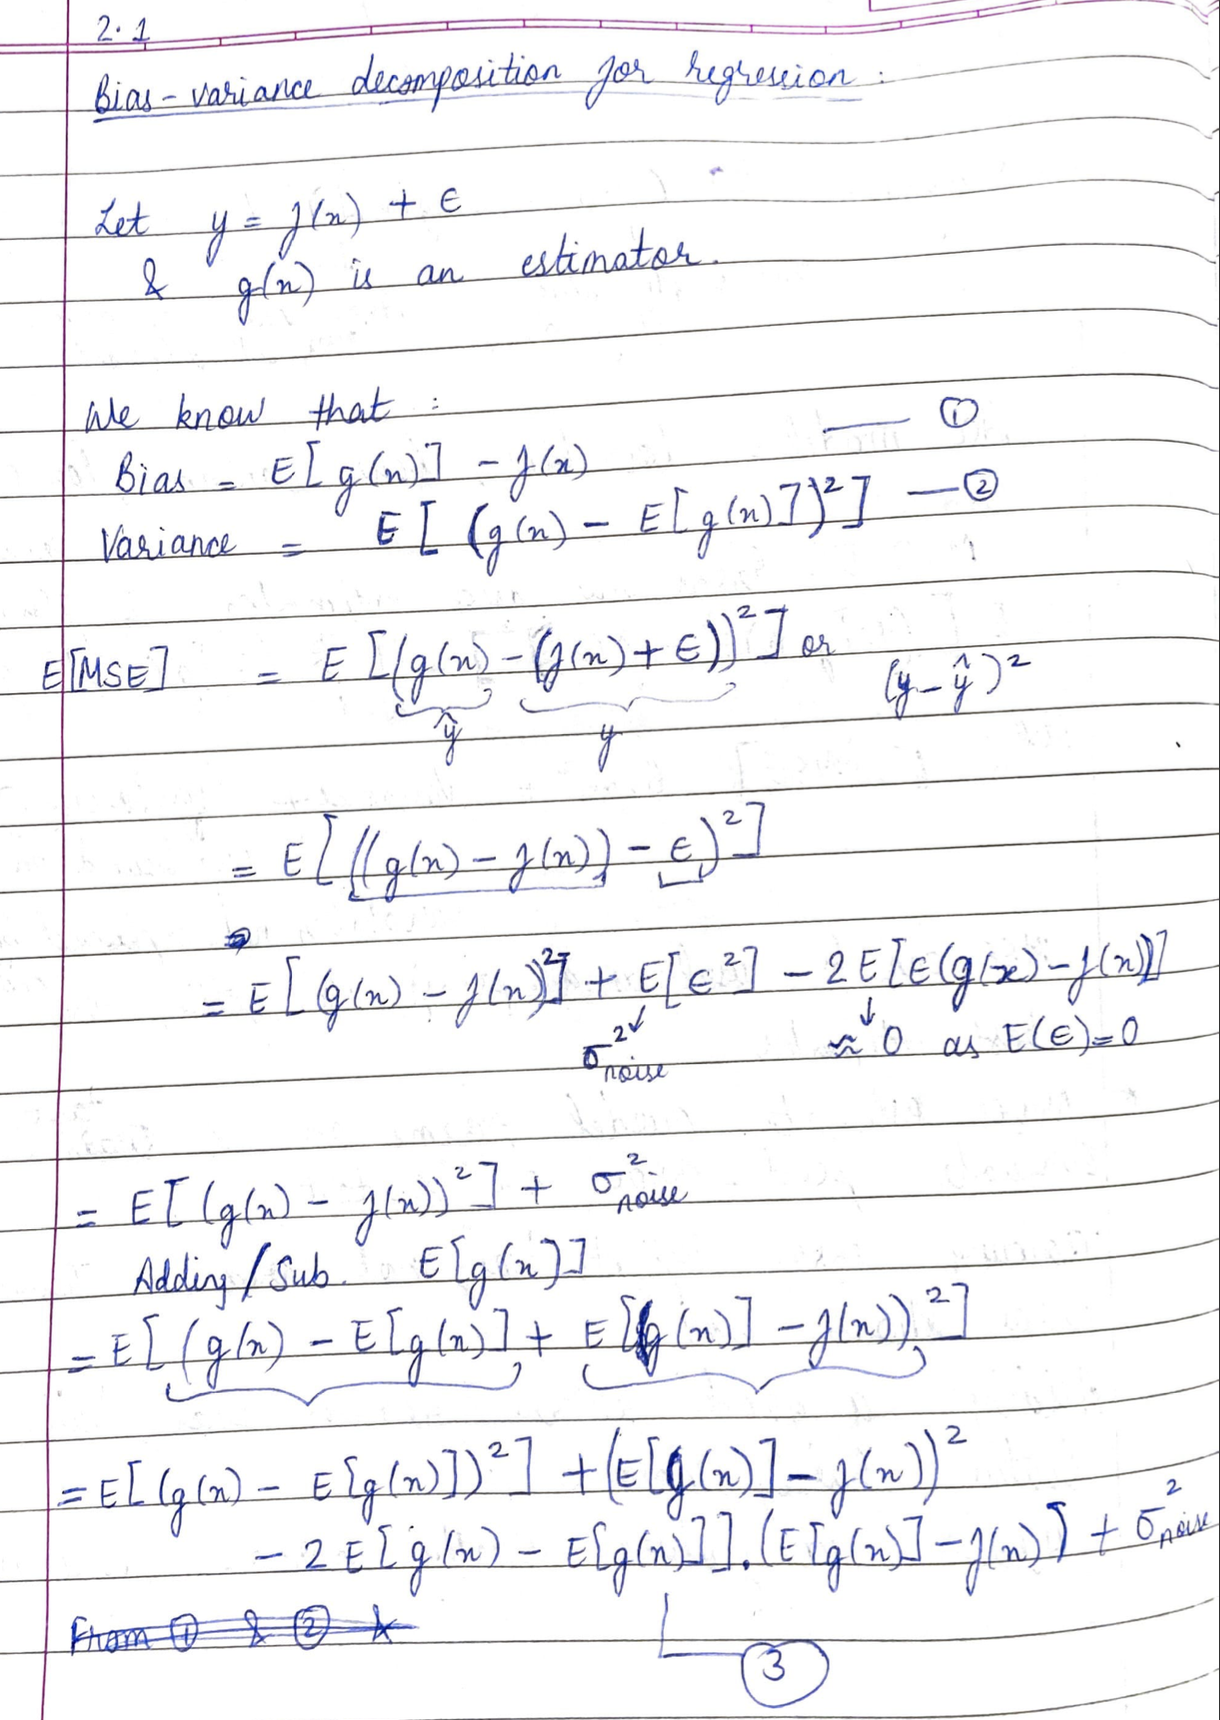

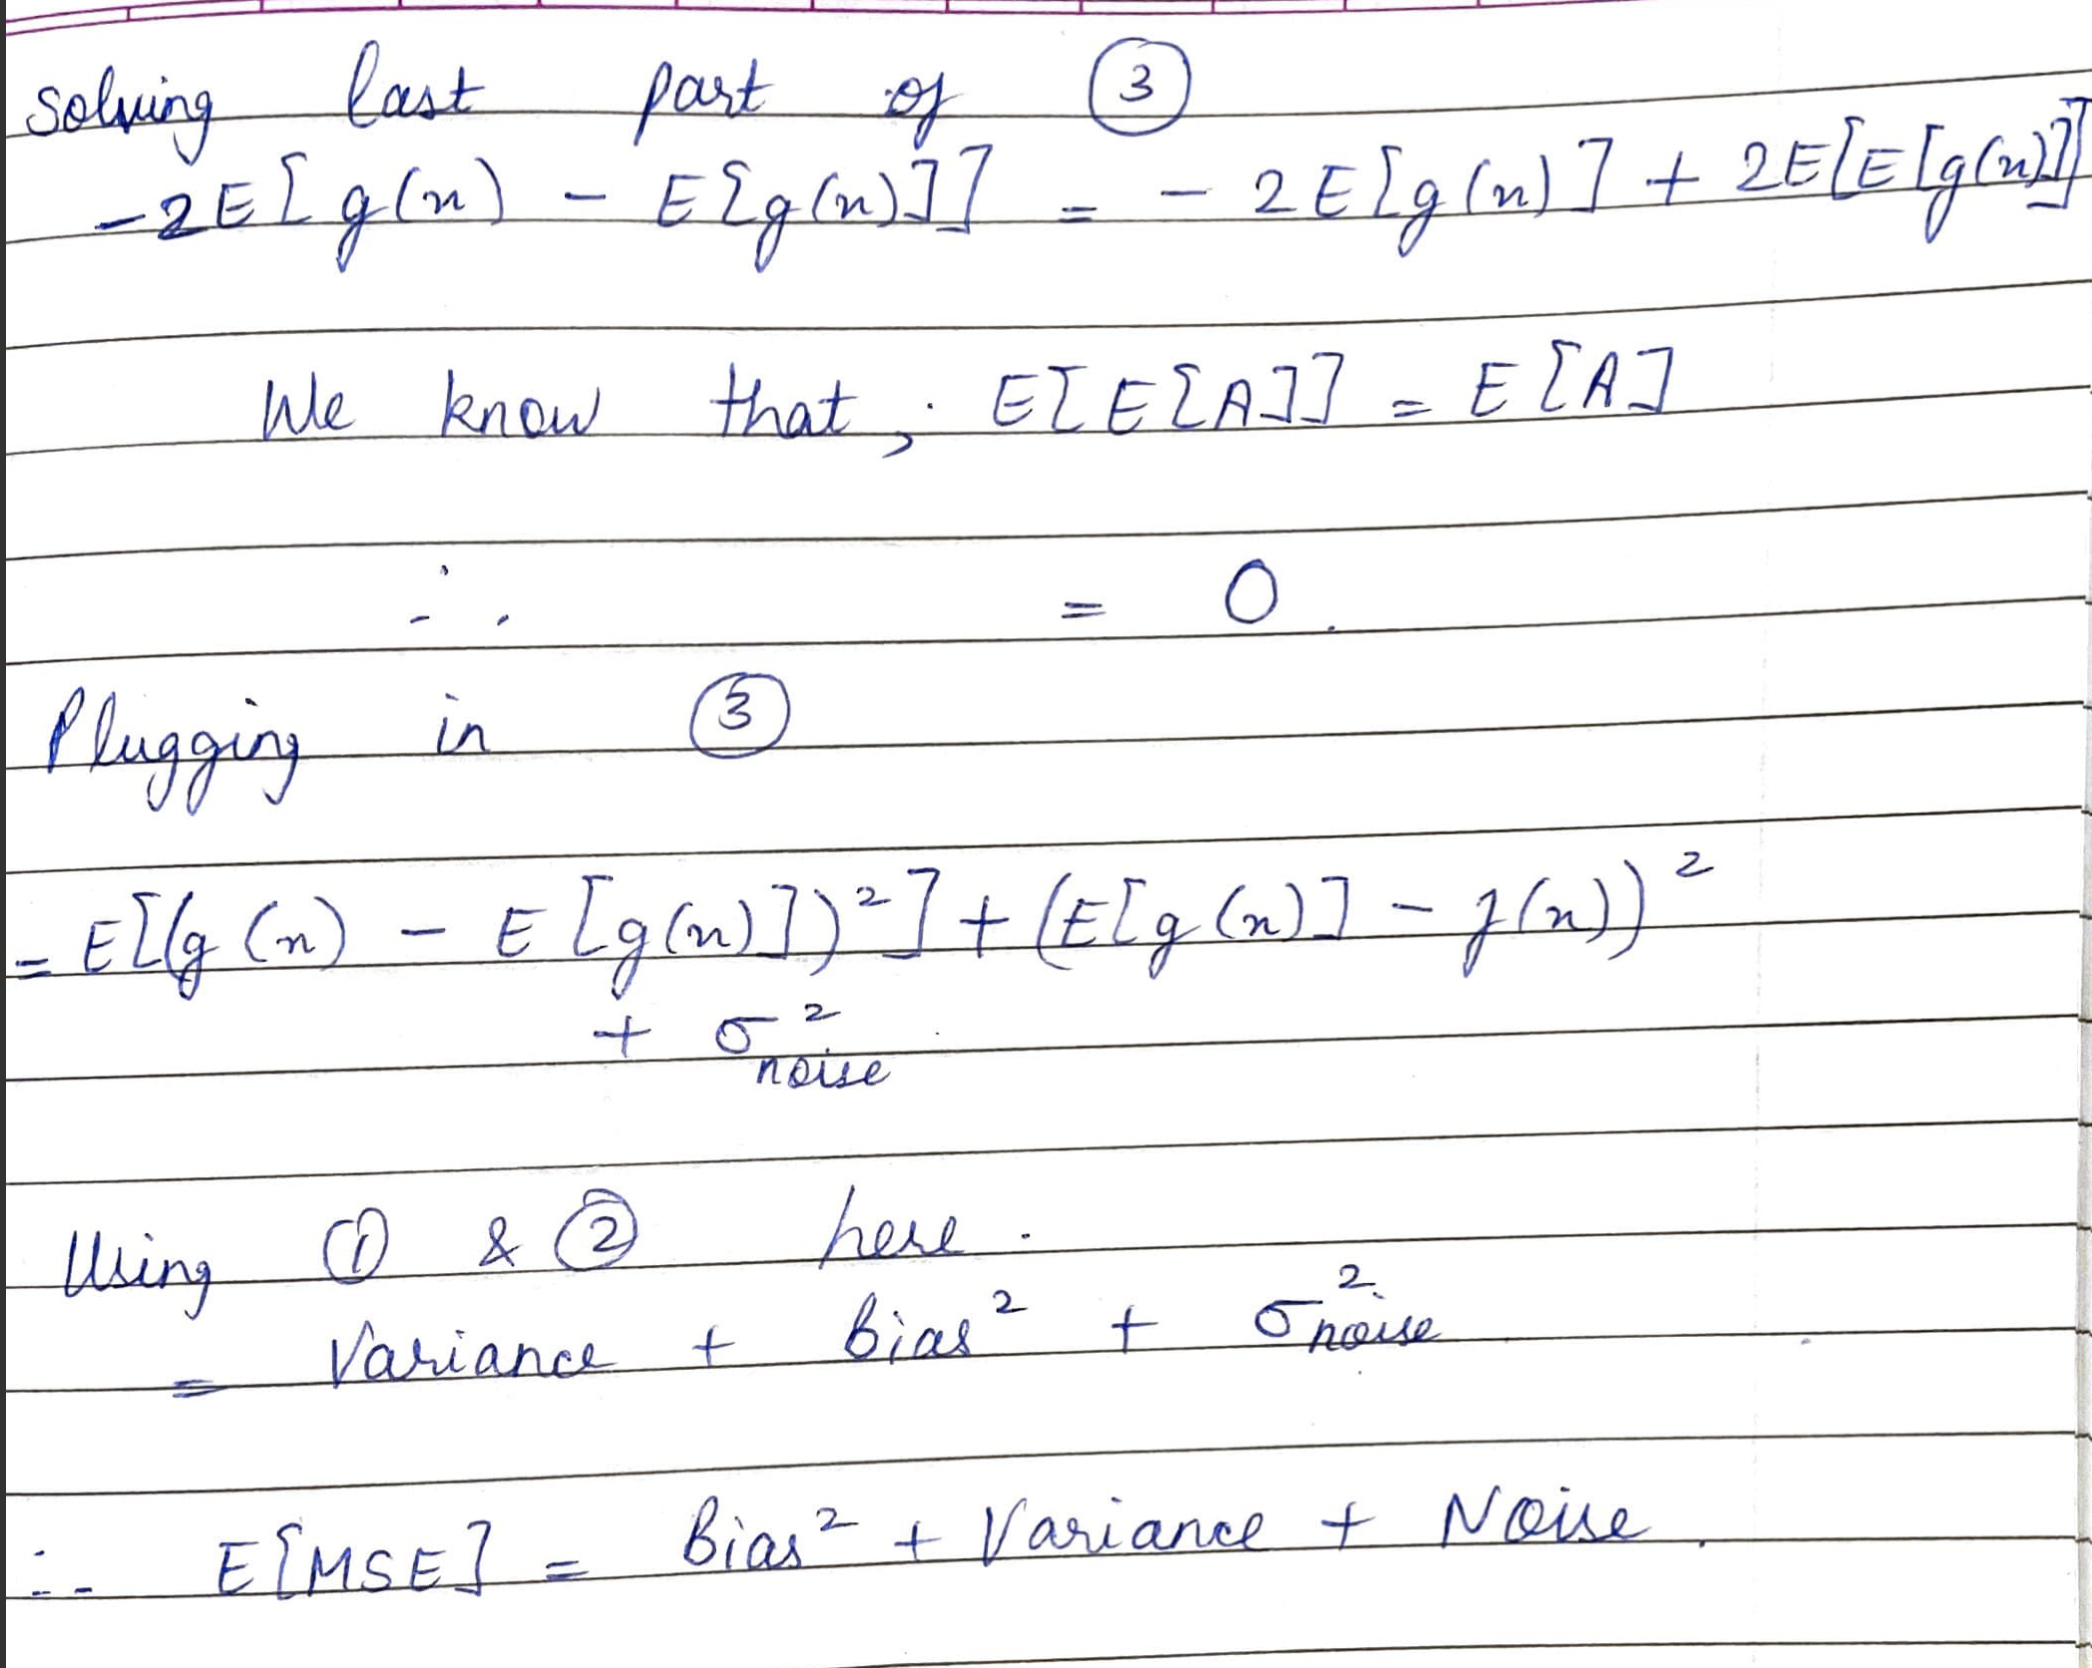

In [ ]:
#2.2

2. y(x) = f(x) + ε, where

f (x) = x + sin(1.5x)

and ε = N (0, 0.3)

and N (0, 0.3) is normal distribution with mean 0 and variance 0.3

In [5]:
N_OBSERVATIONS = 20
X_MIN= 0
X_MAX=10
NOISE_STD = 0.3
NOISE_MEAN = 0

def f(x):
    return x + np.sin(x * 1.5)

np.random.seed(123)
x = np.random.default_rng().uniform(X_MIN, X_MAX, N_OBSERVATIONS)
x.sort()
x_grid = np.linspace(X_MIN, X_MAX, N_OBSERVATIONS)

In [6]:
MARKER_SIZE = 100
DATA_COLOR = 'black'
ERROR_COLOR = 'darkred'
POLYNOMIAL_FIT_COLORS = ['orange', 'royalblue', 'darkgreen']
LEGEND_FONTSIZE = 10
LEGEND_LOC="upper left"
TITLE_FONTISIZE = 16

def plot_fx_data(grid, f, xx, yy):
  """Plot f(x) and noisy samples"""
  fig, axs = plt.subplots(figsize=(10, 6))
  plt.plot(grid, f, color=DATA_COLOR, label='f(x)')
  plt.scatter(xx, yy, s=MARKER_SIZE, edgecolor=DATA_COLOR, facecolors='none', label='y')

Text(0.5, 1.0, '$f(x) = sin(\\pi x)$ and some observations, $y$')

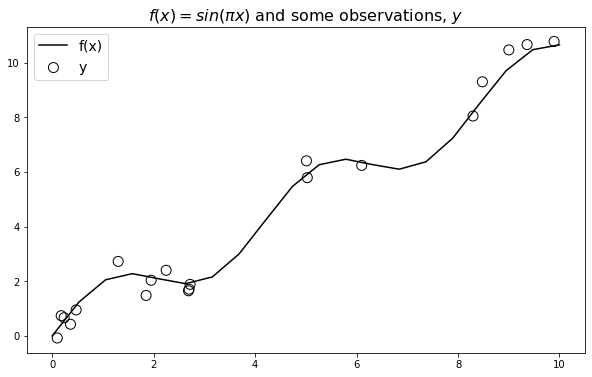

In [7]:
np.random.seed(123)
y = f(x) + np.random.randn(*x.shape) * NOISE_STD
plot_fx_data(x_grid, f(x_grid), x, y)
plt.legend(fontsize=14)
plt.title(f'$f(x) = sin(\pi x)$ and some observations, $y$', fontsize=16)

In [ ]:
# 2.3.

Text(0.5, 1.0, 'Various Polynomial Functions Fit to Observations')

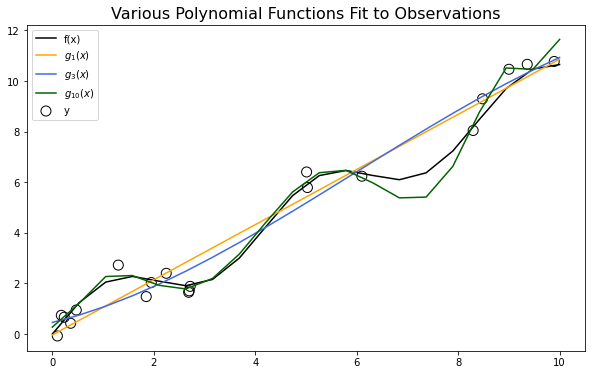

In [8]:
# gn(x)=β0 +β1x+β2x2 +.....+βnxn
plot_fx_data(x_grid, f(x_grid), x, y)

degrees = [1, 3, 10]
beta = {}
fit = {}

for ii, degree in enumerate(degrees):
    beta[degree] = np.polyfit(x, y, degree)
    fit[degree] = np.polyval(beta[degree], x_grid)
    plt.plot(x_grid, fit[degree], POLYNOMIAL_FIT_COLORS[ii], label="$g_{{{}}}(x)$".format(degree))

plt.legend(fontsize=LEGEND_FONTSIZE, loc=LEGEND_LOC)
plt.title("Various Polynomial Functions Fit to Observations", fontsize=TITLE_FONTISIZE)

As seen in the figure above, g<sub>1</sub>(x) provides a poor fit to the observed data, as well as a poor approximation to the function f(x). g<sub>10</sub>(x) provides a very accurate fit to the data points, but varies wildly to do so, and therefore provides an inaccurate approximation of f(x). Finally, we see that the estimator g<sub>3</sub>(x)
provides a fairly good fit to the observed data, and a much better job at approximating f(x).

Therefore, g1(x) is underfitting and g10(x) is overfitting.

In [9]:
# 2.4

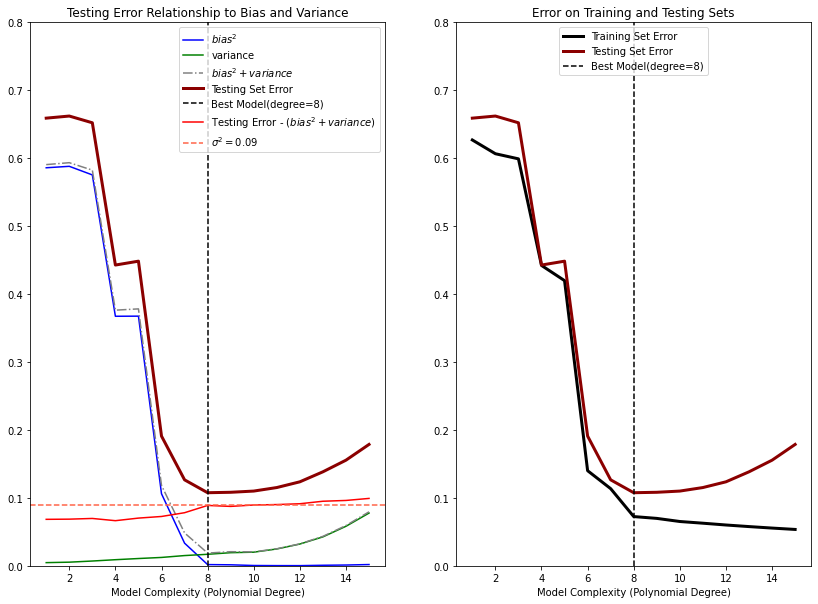

In [12]:
n_observations_per_dataset = 50
n_datasets = 100
max_poly_degree = 15  # Maximum model complexity
model_poly_degrees = range(1, max_poly_degree + 1)

NOISE_STD = 0.3
percent_train = 0.8
n_train = int(np.ceil(n_observations_per_dataset * percent_train))

# Create training/testing inputs
# np.random.seed(123)
x = np.random.default_rng().uniform(X_MIN, X_MAX, n_observations_per_dataset)
x_train = x[:n_train]
x_test = x[n_train:]

# logging variables
theta_hat = defaultdict(list)

pred_train = defaultdict(list)
pred_test = defaultdict(list)

train_errors = defaultdict(list)
test_errors = defaultdict(list)

def error_function(pred, actual):
  return (pred - actual) ** 2

# Loop over datasets

for dataset in range(n_datasets):

    # Simulate training/testing targets
    # np.random.seed(123)
    y_train = f(x_train) + NOISE_STD * np.random.randn(*x_train.shape)
    y_test = f(x_test) + NOISE_STD * np.random.randn(*x_test.shape)

    # Loop over model complexities
    for degree in model_poly_degrees:
        # Train model
        tmp_theta_hat = np.polyfit(x_train, y_train, degree)

        # Make predictions on train set
        tmp_pred_train = np.polyval(tmp_theta_hat, x_train)
        pred_train[degree].append(tmp_pred_train)

        # Test predictions
        tmp_pred_test = np.polyval(tmp_theta_hat, x_test)
        pred_test[degree].append(tmp_pred_test)

        # Mean Squared Error for train and test sets
        train_errors[degree].append(np.mean(error_function(tmp_pred_train, y_train)))
        test_errors[degree].append(np.mean(error_function(tmp_pred_test, y_test)))


def calculate_estimator_bias_squared(pred_test):
    pred_test = np.array(pred_test)
    average_model_prediction = pred_test.mean(0)  # E[g(x)]

    # (E[g(x)] - f(x))^2, averaged across all trials
    return np.mean((average_model_prediction - f(x_test)) ** 2)


def calculate_estimator_variance(pred_test):
  pred_test = np.array(pred_test)
  average_model_prediction = pred_test.mean(0)  # E[g(x)]

  # (g(x) - E[g(x)])^2, averaged across all trials
  return np.mean((pred_test - average_model_prediction) ** 2)


complexity_train_error = []
complexity_test_error = []
bias_squared = []
variance = []
for degree in model_poly_degrees:
    complexity_train_error.append(np.mean(train_errors[degree]))
    complexity_test_error.append(np.mean(test_errors[degree]))
    bias_squared.append(calculate_estimator_bias_squared(pred_test[degree]))
    variance.append(calculate_estimator_variance(pred_test[degree]))

best_model_degree = model_poly_degrees[np.argmin(complexity_test_error)]


# Visualizations
fig, axs = plt.subplots(1, 2, figsize=(14, 10))

## Plot Bias^2 + variance
plt.sca(axs[0])
plt.plot(model_poly_degrees, bias_squared, color='blue', label='$bias^2$')
plt.plot(model_poly_degrees, variance, color='green', label='variance')
plt.plot(model_poly_degrees, np.array(bias_squared) + np.array(variance),  linestyle='-.', color='gray', label='$bias^2 + variance$')
plt.plot(model_poly_degrees, complexity_test_error, label='Testing Set Error', linewidth=3, color=ERROR_COLOR)
plt.axvline(best_model_degree, linestyle='--', color='black', label=f'Best Model(degree={best_model_degree})')
plt.plot(model_poly_degrees, np.array(complexity_test_error) - (np.array(bias_squared) + np.array(variance)), color='red', label='Testing Error - ($bias^2 + variance$)')
plt.axhline(NOISE_STD **2, color='tomato', linestyle='--', label=f'$\sigma^2 = {round(NOISE_STD**2, 3)}$')

plt.xlabel('Model Complexity (Polynomial Degree)')
plt.ylim([0, .8]);
plt.legend()
plt.title('Testing Error Relationship to Bias and Variance')

## Plot Train / Test Set Error
plt.sca(axs[1])
plt.plot(model_poly_degrees, complexity_train_error, label='Training Set Error', linewidth=3, color=DATA_COLOR)
plt.plot(model_poly_degrees, complexity_test_error, label='Testing Set Error', linewidth=3, color=ERROR_COLOR)
plt.axvline(best_model_degree, linestyle='--', color='black', label=f'Best Model(degree={best_model_degree})')
plt.ylim([0, .8]);
plt.xlabel('Model Complexity (Polynomial Degree)')
plt.title('Error on Training and Testing Sets')
plt.legend(loc='upper center')

The best model is of degree 8 as it has the least test error.

In [13]:
# 2.5

In [ ]:
pred_test = []
test_errors = []

x_train= x_train.reshape(-1,1)
x_test= x_test.reshape(-1,1)

for dataset in range(n_datasets):
  y_train = f(x_train) + NOISE_STD * np.random.randn(*x_train.shape)
  y_test = f(x_test) + NOISE_STD * np.random.randn(*x_test.shape)

  l2_model = Ridge()
  l2_model.fit(x_train, y_train)
  l2_pred_test = l2_model.predict(x_test)

  test_errors.append(error_function(l2_pred_test, y_test))
  pred_test.append(l2_pred_test)

print("Unregularized bias_sq: {}, Regularized bias_sq : {}".format(bias_squared[9], calculate_estimator_bias_squared(pred_test)))
print("Unregularized var: {}, Regularized var : {}".format(variance[9],calculate_estimator_variance(pred_test)))
print("Unregularized mse: {}, Regularized mse : {}".format(complexity_test_error[9], np.mean(test_errors)))

Unregularized bias_sq: 0.00010223558723152006, Regularized bias_sq : 0.4776178007233158
Unregularized var: 0.035642127526449234, Regularized var : 0.005053761919702661
Unregularized mse: 0.1267810179887216, Regularized mse : 0.5934312865415043


On applying L2 regularization, variance decreased a lot but bias increased significantly. Since *mse = bias<sup>2</sup> + variance + noise*, mse also increases overall. This is because L2 regularisation penalizes the complexity of the model, encouraging it to be simpler. It controls the excessive fluctuations in the estimation which means there is a lesser chance of overfitting hence low variance. However, by this penalty, it allows less flexibility (less complexity) thus high bias.

### Problem-3

In [ ]:
# 3.1.

[Dataset 1: bank-marketing](https://www.openml.org/search?type=data&status=active&id=1461&sort=runs)
The data is related with direct marketing campaigns of a Portuguese banking institution. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (or not) subscribed.

In [ ]:
bank_dataset = openml.datasets.get_dataset(1461)
bank_dataset_X, bank_dataset_y, bank_categorical_indicator, bank_attribute_names = bank_dataset.get_data(
    dataset_format="array", target=bank_dataset.default_target_attribute
)

print("bank_dataset_X shape: {}, bank_dataset_y: {}".format(bank_dataset_X.shape, bank_dataset_y.shape))
X_train_bank, X_test_bank, y_train_bank, y_test_bank = train_test_split(bank_dataset_X, bank_dataset_y, test_size=0.2, stratify = bank_dataset_y)
print("X_train_bank shape: {}, y_train_bank: {}, X_test_bank shape: {}, y_test_bank: {}".format(X_train_bank.shape, y_train_bank.shape, X_test_bank.shape, y_test_bank.shape))

print("\nnumber of features: ", bank_dataset_X.shape[1])
print("Attribute names:", bank_attribute_names)
print("number of instances: ", bank_dataset_X.shape[0])
print("number of classes: ",len(set(bank_dataset_y)))
print("number of numerical features: ", len([c for c in bank_categorical_indicator if not c]))
print("number of categorical features: ", len([c for c in bank_categorical_indicator if c]))

bank_dataset_X shape: (45211, 16), bank_dataset_y: (45211,)
X_train_bank shape: (36168, 16), y_train_bank: (36168,), X_test_bank shape: (9043, 16), y_test_bank: (9043,)

number of features:  16
Attribute names: ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16']
number of instances:  45211
number of classes:  2
number of numerical features:  7
number of categorical features:  9


[Dataset 2: iris](https://www.openml.org/search?type=data&status=active&id=61)
The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant.

In [ ]:
iris_dataset = openml.datasets.get_dataset(61)
iris_dataset_X, iris_dataset_y, iris_categorical_indicator, iris_attribute_names = iris_dataset.get_data(
    dataset_format="array", target=iris_dataset.default_target_attribute
)
print("iris_dataset_X shape: {}, iris_dataset_y: {}".format(iris_dataset_X.shape, iris_dataset_y.shape))
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(iris_dataset_X, iris_dataset_y, test_size=0.2, stratify = iris_dataset_y)
print("X_train_iris shape: {}, y_train_iris: {}, X_test_iris shape: {}, y_test_iris: {}".format(X_train_iris.shape, y_train_iris.shape, X_test_iris.shape, y_test_iris.shape))

print("\nnumber of features: ", iris_dataset_X.shape[1])
print("Attribute names:", iris_attribute_names)
print("number of instances: ", iris_dataset_X.shape[0])
print("number of classes: ",len(set(iris_dataset_y)))
print("number of numerical features: ", len([c for c in iris_categorical_indicator if not c]))
print("number of categorical features: ", len([c for c in iris_categorical_indicator if c]))

iris_dataset_X shape: (150, 4), iris_dataset_y: (150,)
X_train_iris shape: (120, 4), y_train_iris: (120,), X_test_iris shape: (30, 4), y_test_iris: (30,)

number of features:  4
Attribute names: ['sepallength', 'sepalwidth', 'petallength', 'petalwidth']
number of instances:  150
number of classes:  3
number of numerical features:  4
number of categorical features:  0


In [ ]:
# 3.2.

In [ ]:
def plot_curve(a, b, col, label_x, label_y, fig_title):
  plt.plot(a, b, c = col)
  plt.xlabel(label_x)
  plt.ylabel(label_y)
  plt.title(fig_title)

training sub-sample shape 0 (10%): (3616, 16)
training sub-sample shape 1 (20%): (7233, 16)
training sub-sample shape 2 (30%): (10850, 16)
training sub-sample shape 3 (40%): (14467, 16)
training sub-sample shape 4 (50%): (18084, 16)
training sub-sample shape 5 (60%): (21700, 16)
training sub-sample shape 6 (70%): (25317, 16)
training sub-sample shape 7 (80%): (28934, 16)
training sub-sample shape 8 (90%): (32551, 16)
training sub-sample shape 9 (100%): (36168, 16)

Bank marketing dataset random forest training time (s): [0.5418803691864014, 0.9641594886779785, 1.3943712711334229, 1.8146908283233643, 2.4031214714050293, 2.806286096572876, 3.3668668270111084, 3.9049274921417236, 4.3858959674835205, 5.055421352386475]
Bank marketing dataset gradient boosting training time (s): [0.6257233619689941, 1.1837666034698486, 1.6968388557434082, 2.2387123107910156, 2.8070645332336426, 3.3778884410858154, 4.0446953773498535, 4.627429485321045, 5.24904727935791, 5.868957996368408]

Bank marketing da

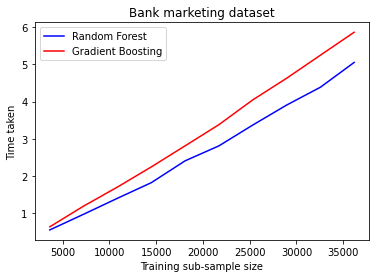

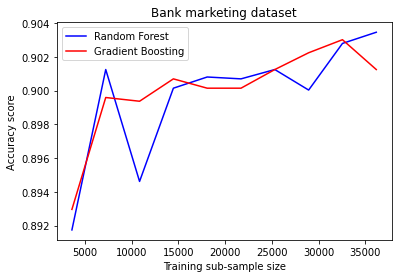

In [ ]:
# For bank dataset
training_times_rf = []
training_times_gb = []
accuracy_rf = []
accuracy_gb = []

full_training_size = len(X_train_bank)
full_training_range = [*range(0, full_training_size)]
percent_list = [x for x in range(10, 110, 10)]
each_training_size = [(p * full_training_size)//100 for p in percent_list]

for idx, percent in enumerate(percent_list):
  random.shuffle(full_training_range)
  rand_indices = full_training_range[:each_training_size[idx]]
  curr_dataset_X = X_train_bank[rand_indices,:]
  curr_dataset_y = y_train_bank[rand_indices]

  print("training sub-sample shape {} ({}%): {}".format(idx, percent, curr_dataset_X.shape))
  start = time.time()
  rf_cls = RandomForestClassifier().fit(curr_dataset_X, curr_dataset_y)
  end = time.time()
  training_times_rf.append((end-start))
  acc = accuracy_score(y_test_bank, rf_cls.predict(X_test_bank))
  accuracy_rf.append(acc)

  start = time.time()
  gb_cls = GradientBoostingClassifier().fit(curr_dataset_X, curr_dataset_y)
  end = time.time()
  training_times_gb.append((end-start))
  acc = accuracy_score(y_test_bank, gb_cls.predict(X_test_bank))
  accuracy_gb.append(acc)


plt.figure(1)
plot_curve(each_training_size, training_times_rf, "blue", "Training sub-sample size", "Time taken", "Bank marketing dataset")
plot_curve(each_training_size, training_times_gb, "red", "Training sub-sample size", "Time taken", "Bank marketing dataset")
plt.legend(['Random Forest', 'Gradient Boosting'])
print("\nBank marketing dataset random forest training time (s): {}".format(training_times_rf))
print("Bank marketing dataset gradient boosting training time (s): {}".format(training_times_gb))


plt.figure(2)
plot_curve(each_training_size, accuracy_rf, "blue", "Training sub-sample size", "Accuracy score", "Bank marketing dataset")
plot_curve(each_training_size, accuracy_gb, "red", "Training sub-sample size", "Accuracy score", "Bank marketing dataset")
plt.legend(['Random Forest', 'Gradient Boosting'])
print("\nBank marketing dataset random forest accuracy (%): {}".format(accuracy_rf))
print("Bank marketing dataset gradient boosting accuracy (%): {}".format(accuracy_gb))

In [ ]:
full_training_size = len(X_train_iris)
print(full_training_size)
full_training_range = [*range(0, full_training_size)]
percent_list = [x for x in range(10, 110, 10)]
each_training_size = [(p * full_training_size)//100 for p in percent_list]
print(each_training_size)

120
[12, 24, 36, 48, 60, 72, 84, 96, 108, 120]


training sub-sample shape 0 (10%): (12, 4)
training sub-sample shape 1 (20%): (24, 4)
training sub-sample shape 2 (30%): (36, 4)
training sub-sample shape 3 (40%): (48, 4)
training sub-sample shape 4 (50%): (60, 4)
training sub-sample shape 5 (60%): (72, 4)
training sub-sample shape 6 (70%): (84, 4)
training sub-sample shape 7 (80%): (96, 4)
training sub-sample shape 8 (90%): (108, 4)
training sub-sample shape 9 (100%): (120, 4)

Iris dataset random forest training time (s): [0.13590192794799805, 0.15001845359802246, 0.12806057929992676, 0.13161635398864746, 0.14155793190002441, 0.13691091537475586, 0.12990808486938477, 0.13767766952514648, 0.1510763168334961, 0.14474010467529297]
Iris dataset gradient boosting training time (s): [0.1477818489074707, 0.16523218154907227, 0.17464613914489746, 0.24616098403930664, 0.21149873733520508, 0.2202911376953125, 0.22760605812072754, 0.22052574157714844, 0.23756074905395508, 0.2474379539489746]

Iris dataset random forest accuracy (%): [0.7666666

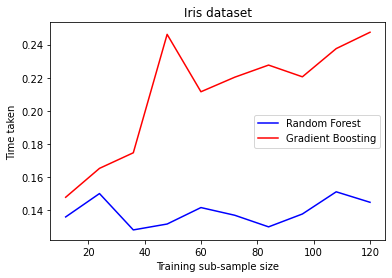

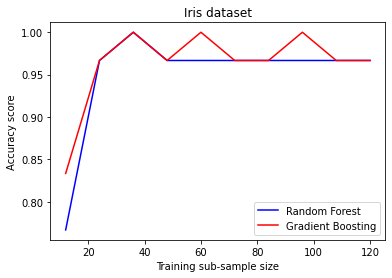

In [ ]:
# For iris dataset
training_times_rf = []
training_times_gb = []
accuracy_rf = []
accuracy_gb = []

full_training_size = len(X_train_iris)
full_training_range = [*range(0, full_training_size)]
percent_list = [x for x in range(10, 110, 10)]
each_training_size = [(p * full_training_size)//100 for p in percent_list]

for idx, percent in enumerate(percent_list):
  random.shuffle(full_training_range)
  rand_indices = full_training_range[:each_training_size[idx]]
  curr_dataset_X = X_train_iris[rand_indices,:]
  curr_dataset_y = y_train_iris[rand_indices]

  print("training sub-sample shape {} ({}%): {}".format(idx, percent, curr_dataset_X.shape))
  start = time.time()
  rf_cls = RandomForestClassifier().fit(curr_dataset_X, curr_dataset_y)
  end = time.time()
  training_times_rf.append((end-start))
  acc = accuracy_score(y_test_iris, rf_cls.predict(X_test_iris))
  accuracy_rf.append(acc)

  start = time.time()
  gb_cls = GradientBoostingClassifier().fit(curr_dataset_X, curr_dataset_y)
  end = time.time()
  training_times_gb.append((end-start))
  acc = accuracy_score(y_test_iris, gb_cls.predict(X_test_iris))
  accuracy_gb.append(acc)

plt.figure(1)
plot_curve(each_training_size, training_times_rf, "blue", "Training sub-sample size", "Time taken", "Iris dataset")
plot_curve(each_training_size, training_times_gb, "red", "Training sub-sample size", "Time taken", "Iris dataset")
plt.legend(['Random Forest', 'Gradient Boosting'])
print("\nIris dataset random forest training time (s): {}".format(training_times_rf))
print("Iris dataset gradient boosting training time (s): {}".format(training_times_gb))

plt.figure(2)
plot_curve(each_training_size, accuracy_rf, "blue", "Training sub-sample size", "Accuracy score", "Iris dataset")
plot_curve(each_training_size, accuracy_gb, "red", "Training sub-sample size", "Accuracy score", "Iris dataset")
plt.legend(['Random Forest', 'Gradient Boosting'])
print("\nIris dataset random forest accuracy (%): {}".format(accuracy_rf))
print("Iris dataset gradient boosting accuracy (%): {}".format(accuracy_gb))

In [ ]:
# 3.3



1.   **Training time**:


*   Bank marketing (Dataset 1): Training time for both RF classifier and Gradient boosting almost increases lineraly with increasing training data size. However, time taken in gradient boosting is always more than random forest.
*   Iris (Dataset 2): Training time for rf classifier remains almost constant. Training time for gradient boosting is always more than rf and seems to increase linearly. 

 So, rf classifier has shorter training time (on avg.)

2.   **Accuracy score**


*   Bank marketing (Dataset 1): Accuracy score for RF classifier does not linearly increase with training data size as despite the peaks there are a few major dips. But accuarcy in gradient boosting almost increases linearly with a few small dips.
*   Iris (Dataset 2): Similarly, accuracy score remains almost similar for rf and gb with gradient boosting performing slightly better as sample size increases.
 
 So, gradient boosting gives better accuracy (on an avg.)

3. Another observation is that *more training data size does not always mean higher accuracy* (as there are dips seen on the right side of both the graphs). An algorithm can also be *worse or better than the other based on the data size as well as the data itself*.










### Problem 4

In [ ]:
# 4.1

True negative matters for ROC but not PR curve.


A point in ROC space defines a
unique confusion matrix when the dataset is fixed.
In PR space, each point corresponds to a unique confusion
matrix because despite no dependence on TN, with a fixed number of positive
and negative examples, given the other three entries
in a matrix(TP, FP, FN), TN is uniquely determined. Consequently, we have a one-to-one mapping between confusion matrices and points in PR space. This implies that we also have a one-to-one mapping between
points (each defined by a confusion matrix) in ROC
space and PR space.

In [ ]:
# 4.2

[Dataset: phoneme](https://www.openml.org/search?type=data&status=active&sort=runs&id=1489)

In [ ]:
pho_dataset = openml.datasets.get_dataset(1489)
pho_dataset_X, pho_dataset_y, pho_categorical_indicator, pho_attribute_names = pho_dataset.get_data(
    dataset_format="array", target=pho_dataset.default_target_attribute
)
print("pho_dataset_X shape: {}, pho_dataset_y: {}".format(pho_dataset_X.shape, pho_dataset_y.shape))
X_train_pho, X_test_pho, y_train_pho, y_test_pho = train_test_split(pho_dataset_X, pho_dataset_y, test_size=0.2, stratify = pho_dataset_y)
print("X_train_pho shape: {}, y_train_pho: {}, X_test_pho shape: {}, y_test_pho: {}".format(X_train_pho.shape, y_train_pho.shape, X_test_pho.shape, y_test_pho.shape))

print("\nnumber of features: ", pho_dataset_X.shape[1])
print("Attribute names:", pho_attribute_names)
print("number of instances: ", pho_dataset_X.shape[0])
print("number of classes: ",len(set(pho_dataset_y)))
print("number of numerical features: ", len([c for c in pho_categorical_indicator if not c]))
print("number of categorical features: ", len([c for c in pho_categorical_indicator if c]))

pho_dataset_X shape: (5404, 5), pho_dataset_y: (5404,)
X_train_pho shape: (4323, 5), y_train_pho: (4323,), X_test_pho shape: (1081, 5), y_test_pho: (1081,)

number of features:  5
Attribute names: ['V1', 'V2', 'V3', 'V4', 'V5']
number of instances:  5404
number of classes:  2
number of numerical features:  5
number of categorical features:  0


In [ ]:
# Logistic regression
lr_cls = LogisticRegression()
lr_cls.fit(X_train_pho, y_train_pho)
lr_cls_prob = lr_cls.predict_proba(X_test_pho)

f_lr_cls_prob = lr_cls_prob[:, 0]
t_lr_cls_prob = lr_cls_prob[:, 1]

In [ ]:
# Adaboost
ada_cls = AdaBoostClassifier()
ada_cls.fit(X_train_pho, y_train_pho)
ada_cls_prob = ada_cls.predict_proba(X_test_pho)

f_ada_cls_prob = ada_cls_prob[:, 0]
t_ada_cls_prob = ada_cls_prob[:, 1]


All positive classifer lies at (1,1) on an ROC curve.
 


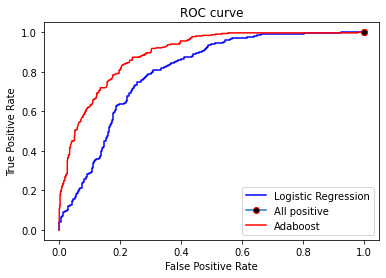

In [ ]:
# roc curve
lr_fpr, lr_tpr, thresholds = roc_curve(y_test_pho, t_lr_cls_prob)
ada_fpr, ada_tpr, thresholds = roc_curve(y_test_pho, t_ada_cls_prob)

print("\nAll positive classifer lies at (1,1) on an ROC curve.\n ")

plot_curve(lr_fpr, lr_tpr, "blue", 'False Positive Rate','True Positive Rate', "ROC curve")
plt.plot(1, 1, marker="o", markersize=6, markeredgecolor="red", markerfacecolor="black")

plot_curve(ada_fpr, ada_tpr, "red", 'False Positive Rate', 'True Positive Rate', "ROC curve")
plt.plot(1, 1, marker="o", markersize=6, markeredgecolor="red", markerfacecolor="black")

plt.legend(['Logistic Regression', 'All positive', 'Adaboost'])

Logistic regression:
First precision value: 0.3092682926829268 Last precision value: 1.0
First recall value: 1.0 Last recall value: 0.0

Adaboost:
First precision value: 0.2973733583489681 Last precision value: 1.0
First recall value: 1.0 Last recall value: 0.0

The first precision and recall values are precision=class balance and recall=1.0 which corresponds to a classifier 
that always predicts the positive class.



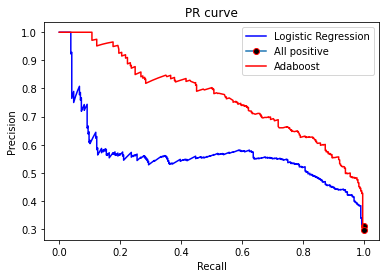

In [ ]:
# pr curve
lr_precision, lr_recall, thresholds = precision_recall_curve(y_test_pho, t_lr_cls_prob)
ada_precision, ada_recall, thresholds = precision_recall_curve(y_test_pho, t_ada_cls_prob)

print("Logistic regression:")
print('First precision value: {} Last precision value: {}'.format(lr_precision[0], lr_precision[-1]))
print('First recall value: {} Last recall value: {}'.format(lr_recall[0], lr_recall[-1]))

print("\nAdaboost:")
print('First precision value: {} Last precision value: {}'.format(ada_precision[0], ada_precision[-1]))
print('First recall value: {} Last recall value: {}\n'.format(ada_recall[0], ada_recall[-1]))

print("The first precision and recall values are precision=class balance and recall=1.0 which corresponds to a classifier \nthat always predicts the positive class.\n")
plot_curve(lr_recall, lr_precision, "blue", 'Recall','Precision', "PR curve")
plt.plot(1, lr_precision[0], marker="o", markersize=6, markeredgecolor="red", markerfacecolor="black")

plot_curve(ada_recall, ada_precision, "red", 'Recall','Precision', "PR curve")
plt.plot(1, ada_precision[0], marker="o", markersize=6, markeredgecolor="red", markerfacecolor="black")

plt.legend(['Logistic Regression', 'All positive', 'Adaboost'])

In [ ]:
# 4.3

In [ ]:
# auroc
lr_auroc = roc_auc_score(y_test_pho, t_lr_cls_prob)
ada_auroc = roc_auc_score(y_test_pho, t_ada_cls_prob)
print("AUROC LR: {}, Ada: {}".format(lr_auroc, ada_auroc))

# aupr
lr_aupr = auc(lr_recall, lr_precision)
ada_aupr = auc(ada_recall, ada_precision)
print("AUPR LR: {}, Ada: {}".format(lr_aupr, ada_aupr))

# auprg
prg_curve = prg.create_prg_curve(y_test_pho, t_lr_cls_prob)
lr_auprg = prg.calc_auprg(prg_curve)
prg_curve = prg.create_prg_curve(y_test_pho, t_ada_cls_prob)
ada_auprg = prg.calc_auprg(prg_curve)
print("AUPRG LR: {}, Ada: {}".format(lr_auprg, ada_auprg))

AUROC LR: 0.7987968024840206, Ada: 0.8919929971757478
AUPR LR: 0.5647123616856636, Ada: 0.7715954451406943
AUPRG LR: 0.644025176181328, Ada: 0.8643221326142074


Yes, I agree with the conclusion of the NIPS paper that practitioners should use PR gain curves rather than PR curves. 

In PR gain curve, the always positive classifier serves as the baseline (recG = 1 and precG = 0), which makes it recall aware in comparison to traditional PR curve where baseline performance is a horizontal line which depends on the class distribution. Area under PR curves can easily favour models with lower expected F1 score than others, and so the use of Precision-Recall-Gain curves will result in better model selection.

Other advatanges of PR gain curve are universal baseline, linear interpolation and optimality, interpratable area, etc.